In [1]:
from __future__ import print_function
import torch
import torchvision
import torchvision.transforms as transforms

x=torch.Tensor(5,3)
print (x)

In [2]:
x=torch.rand(5,3)
print(x)


 0.4661  0.3715  0.6269
 0.8967  0.4380  0.4677
 0.7600  0.7076  0.1848
 0.3093  0.2083  0.8876
 0.7102  0.2443  0.1963
[torch.FloatTensor of size 5x3]



In [3]:
y=torch.rand(5,3)
print(y)


 0.6883  0.3051  0.4672
 0.4685  0.9681  0.8504
 0.2560  0.6713  0.9927
 0.7260  0.6385  0.3946
 0.4903  0.6562  0.7930
[torch.FloatTensor of size 5x3]



In [17]:
print(torch.add(x,y))


 1.1519  0.8498  1.1018
 0.2504  0.4644  0.7634
 1.2922  1.4474  1.6810
 1.9350  0.2757  0.4016
 0.6109  0.6083  1.4174
[torch.FloatTensor of size 5x3]



In [18]:
y.add_(x)


 1.1519  0.8498  1.1018
 0.2504  0.4644  0.7634
 1.2922  1.4474  1.6810
 1.9350  0.2757  0.4016
 0.6109  0.6083  1.4174
[torch.FloatTensor of size 5x3]

In [19]:
print(x[:,-1])


 0.7871
 0.3508
 0.8965
 0.1044
 0.8702
[torch.FloatTensor of size 5]



In [21]:
if torch.cuda.is_available():
    x=x.cuda()
    y=y.cuda()
    x+y
    print(x+y)

In [49]:
import torch
from torch.autograd import Variable

In [52]:
x=Variable(torch.ones(2,2),requires_grad=True)
y=x+2
print(y.grad_fn)
z=y*y*3
out=z.mean()
out.backward(retain_graph=True)
print(x.grad)

Variable containing:
 4.5000  4.5000
 4.5000  4.5000
[torch.FloatTensor of size 2x2]



In [53]:
x = torch.randn(3)
x = Variable(x, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
    y = y * 2

print(y)

Variable containing:
-871.9017
 532.6681
 -30.6696
[torch.FloatTensor of size 3]



In [4]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

In [46]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
print(net)

Net (
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear (400 -> 120)
  (fc2): Linear (120 -> 84)
  (fc3): Linear (84 -> 10)
)


In [47]:
params = list(net.parameters())
print(len(params))
print(params[4].size())  # conv1's .weight

10
torch.Size([120, 400])


In [50]:
input = Variable(torch.randn(1, 1, 32, 32))
out = net(input)
print(out)
net.zero_grad()
out.backward(torch.randn(1, 10))
print(out)



Variable containing:
 0.0410  0.0940 -0.1769  0.0153 -0.0931  0.0679  0.0420 -0.1162  0.0874  0.0717
[torch.FloatTensor of size 1x10]

Variable containing:
 0.0410  0.0940 -0.1769  0.0153 -0.0931  0.0679  0.0420 -0.1162  0.0874  0.0717
[torch.FloatTensor of size 1x10]



In [109]:
output = net(input)
target = Variable(torch.arange(1, 11))  # a dummy target, for example
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss.grad_fn)
print(loss.grad_fn.next_functions[0][0])
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])



BackPropogation

In [110]:
net.zero_grad()     # zeroes the gradient buffers of all parameters

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
Variable containing:
 0
 0
 0
 0
 0
 0
[torch.FloatTensor of size 6]

conv1.bias.grad after backward
Variable containing:
1.00000e-02 *
  0.0575
 -1.7447
  7.6211
 -7.1591
  1.8718
 -4.2965
[torch.FloatTensor of size 6]



Updating weights

In [111]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)
print(net.parameters) 
params = list(net.parameters())
print(params[9])



<bound method Module.parameters of Net (
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear (400 -> 120)
  (fc2): Linear (120 -> 84)
  (fc3): Linear (84 -> 10)
)>
Parameter containing:
 0.0708
 0.1668
 0.0177
 0.1236
 0.1426
 0.3103
 0.3130
 0.2034
 0.3812
 0.4253
[torch.FloatTensor of size 10]



Using tourch.optim

In [113]:
import torch.optim as optim

print(net.parameters) 
params = list(net.parameters())
print(params[9])

# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad()   # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
print(net.conv1.bias.grad)
optimizer.step()    # Does the update

<bound method Module.parameters of Net (
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear (400 -> 120)
  (fc2): Linear (120 -> 84)
  (fc3): Linear (84 -> 10)
)>
Parameter containing:
 0.0727
 0.1704
 0.0236
 0.1313
 0.1522
 0.3216
 0.3264
 0.2189
 0.3983
 0.4444
[torch.FloatTensor of size 10]

Variable containing:
1.00000e-02 *
  0.7551
 -2.5942
  6.9178
 -5.7233
  3.0053
 -5.0827
[torch.FloatTensor of size 6]



In [2]:
import torch
import torchvision
import torchvision.transforms as transforms


In [4]:
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

In [5]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

In [7]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


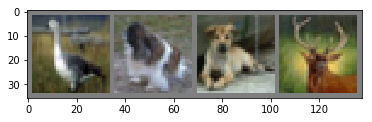

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

def imshow(img):
    img=img/2+0.5
    npimg=img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))
# random examples
dataiter= iter(trainloader)
images,labels=dataiter.next()

# print(dataiter.next())
# show images
imshow(torchvision.utils.make_grid(images))
# print labels
# print(' '.join('%5s' % classes[labels[j]] for j in range(4)))